In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
data = pd.read_csv('principal_components_with_labels.csv')

In [31]:
print(len(data))

32438


In [32]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.01, random_state=42)

In [33]:
print("Train data size: ", len(train_data))
print("Test data size: ", len(test_data))

Train data size:  32113
Test data size:  325


## Linear SVM

In [6]:
clf_linear = svm.SVC(kernel="linear", C=5, probability=True, verbose=True)
clf_linear.fit(train_data.values, train_labels.values)

[LibSVM]

SVC(C=5, kernel='linear', probability=True, verbose=True)

In [7]:
y_train_pred = cross_val_predict(clf_linear, train_data, train_labels, cv=5)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

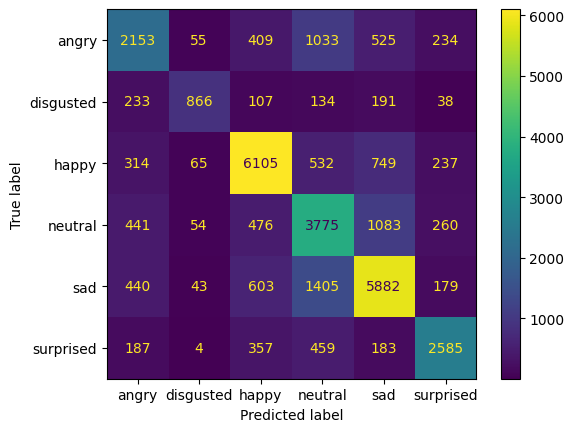

In [8]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=clf_linear.classes_).plot()

In [9]:
precision = precision_score(train_labels, y_train_pred, average='weighted')
recall = recall_score(train_labels, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.6657443675510227
0.6595258673910359
0.6626205280902298


## RBF SVM

In [34]:
clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", svm.SVC(kernel="rbf", C=5, probability=True, verbose=True))
])
clf_rbf.fit(train_data.values, train_labels.values)

[LibSVM]

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, probability=True, verbose=True))])

In [35]:
y_train_pred = cross_val_predict(clf_rbf, train_data, train_labels, cv=5)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

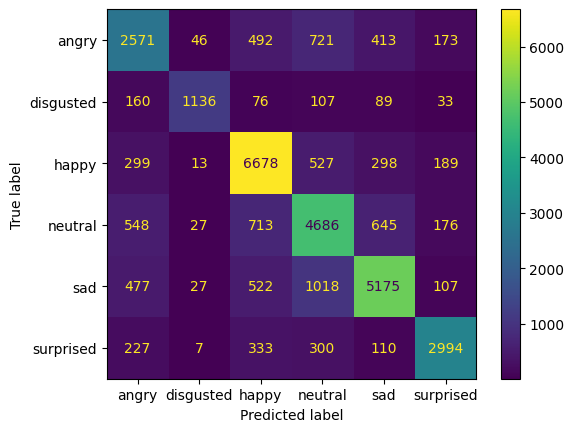

In [36]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=clf_rbf.classes_).plot()

In [37]:
precision = precision_score(train_labels, y_train_pred, average='weighted')
recall = recall_score(train_labels, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.7274853190114418
0.7236944539594556
0.7255849351148088


## Random Forest

In [20]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=True, n_jobs=-1)
forest_clf.fit(train_data.values, train_labels.values)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=True)

In [21]:
y_train_pred = cross_val_predict(forest_clf, train_data, train_labels, cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n

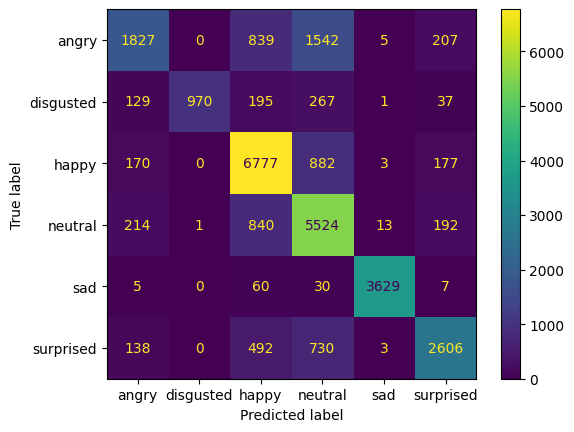

In [22]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=forest_clf.classes_).plot()

In [23]:
precision = precision_score(train_labels, y_train_pred, average='weighted')
recall = recall_score(train_labels, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.7658003169697182
0.7482112794612794
0.7569036278486396


### Exporting

In [38]:
import pickle
pickle.dump(clf_rbf, open("emotion_model.pkl", "wb"))